## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# pip install matplotlib


In [11]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from PIL import Image
import scipy
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_image/Train'
valid_path = 'cell_image/Test'


In [4]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('cell_image/Train/*')

In [7]:
folders

['cell_image/Train\\Parasitized', 'cell_image/Train\\Uninfected']

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
# ### Create Model from scratch using CNN
# model=Sequential()
# model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(500,activation="relu"))
# model.add(Dense(2,activation="sigmoid"))
# model.summary()

In [13]:
# model = Sequential()
# #The rectified linear unit (ReLU) or rectifier activation function introduces the property of nonlinearity to a deep learning model 
# # and solves the vanishing gradients issue.
# # Step 1 - Convolution
# model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))

# # Step 2 - Pooling
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # Adding a second convolutional layer
# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# #adding 3rd layer
# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))

# # Step 3 - Flattening
# model.add(Flatten())

# # Step 4 - Full connection
# model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dense(units = 1, activation = 'sigmoid'))

In [14]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from keras.layers import  MaxPooling2D

# Define the input shape
input_shape = (224, 224, 3)  # Assuming RGB images with dimensions 224x224

# Create a Sequential model
model = Sequential()

# Add the Input layer with the specified input shape
model.add(Input(shape=input_shape))

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), activation='relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a third convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can fit your model with training data and perform other tasks


In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('cell_image/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 22046 images belonging to 2 classes.


In [18]:
training_set

In [19]:
test_set = test_datagen.flow_from_directory('cell_image/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5512 images belonging to 2 classes.


In [20]:
# pip install  SciPy


In [24]:

r=model.fit(training_set,
            epochs = 4,
            validation_data = test_set,
            steps_per_epoch = len(training_set),
            validation_steps = len(test_set))

Epoch 1/4
689/689 [==============================] - 283s 405ms/step - loss: 0.4504 - accuracy: 0.7958 - val_loss: 0.2318 - val_accuracy: 0.9329
Epoch 2/4
689/689 [==============================] - 158s 229ms/step - loss: 0.2020 - accuracy: 0.9335 - val_loss: 0.3618 - val_accuracy: 0.8746
Epoch 3/4
689/689 [==============================] - 156s 227ms/step - loss: 0.1825 - accuracy: 0.9395 - val_loss: 0.1600 - val_accuracy: 0.9418
Epoch 4/4
689/689 [==============================] - 156s 227ms/step - loss: 0.1747 - accuracy: 0.9413 - val_loss: 0.1657 - val_accuracy: 0.9463


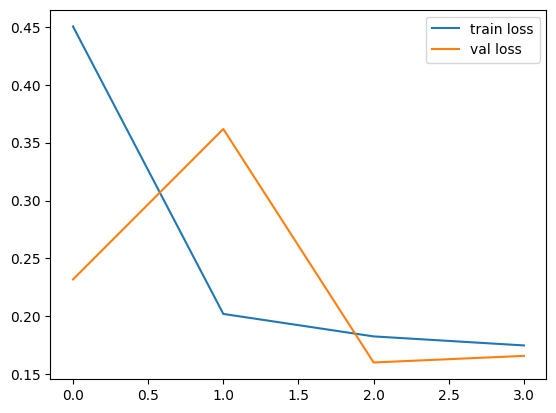

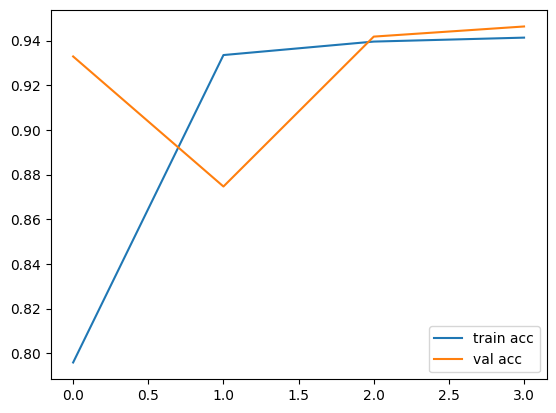

<Figure size 640x480 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('modelel_vgg19.h5')

In [27]:

y_pred = model.predict(test_set)


173/173 [==============================] - 10s 57ms/step


In [28]:
y_pred

array([[2.7188295e-02],
       [9.7193730e-01],
       [9.6394956e-01],
       ...,
       [9.6920300e-01],
       [4.6771776e-04],
       [7.9114885e-05]], dtype=float32)

In [29]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [4]:
model=load_model('model_vgg19.h5')

In [5]:
img=image.load_img('cell_image/test/Parasitized/C99P60ThinF_IMG_20150918_142334_cell_28.png',target_size=(224,224))



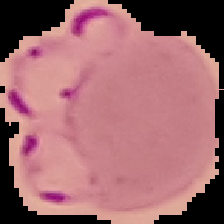

In [6]:
display(img)

In [7]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [8]:
x.shape

(224, 224, 3)

In [9]:
x=x/255

In [12]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [13]:
model.predict(img_data)

1/1 [==============================] - 8s 8s/step


array([[0.650542]], dtype=float32)

In [14]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 43ms/step


In [15]:
print(a)

[0]


In [16]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
